## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_study[mouse_study["Mouse ID"].duplicated()]

print(duplicate_id["Mouse ID"].unique())

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b487' 'b559' 'b759' 'b879' 'c139'
 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766' 'c819'
 'c832' 'c895' 'c927' 'd164' 'd474' 'e213' 'e227' 'e291' 'e476' 'e584'
 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f993' 'g107' 'g296'
 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333' 'h531' 'i386' 'i477'
 'i635' 'i669' 'i901' 'j235' 'j296' 'j365' 'j755' 'j984' 'k210' 'k382'
 'k483' 'k510' 'k603' 'k754' 'k804' 'k862' 'k894' 'l215' 'l264' 'l471'
 'l490' 'l558' 'l661' 'l700' 'l725' 'l733' 'm133' 'm269' 'm331' 'm550'
 'm650

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study
mouse_study_clean = mouse_study.drop_duplicates()
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = mouse_study.groupby("Drug Regimen").mean()
median = mouse_study.groupby("Drug Regimen").median()
variance = mouse_study.groupby("Drug Regimen").var()
StD = mouse_study.groupby("Drug Regimen").std()
SEM = mouse_study.groupby("Drug Regimen").sem()

# Assemble the resulting series into a single summary dataframe.
drug_reg = mouse_study["Drug Regimen"].unique()

summary_df = pd.DataFrame({"Mean": mean["Tumor Volume (mm3)"],
                           "Median": median["Tumor Volume (mm3)"],
                           "Variance": variance["Tumor Volume (mm3)"],
                           "Standard Deviation": StD["Tumor Volume (mm3)"],
                           "SEM": SEM["Tumor Volume (mm3)"],
                          })

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = mouse_study.groupby(["Drug Regimen"]).agg(Mean=("Tumor Volume (mm3)",np.mean),
                                                   Median=("Tumor Volume (mm3)",np.median),
                                                   Variance=("Tumor Volume (mm3)",np.var),
                                                   StD=("Tumor Volume (mm3)",np.std),
                                                   SEM=("Tumor Volume (mm3)",st.sem)
                                                  )

agg_df

,Mean,Median,Variance,StD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
# df for bar plots
unique_mice_DF = mouse_study_clean.groupby("Drug Regimen").count()
mice_count = unique_mice_DF["Mouse ID"]

mice_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

/Users/jeriel.tenorio/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


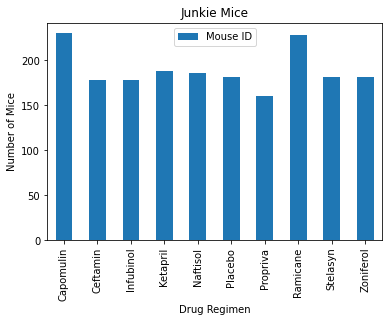

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plot = unique_mice_DF.plot.bar(y='Mouse ID')
plt.title("Junkie Mice")

plt.axes().set_ylabel('Number of Mice')
plt.show()

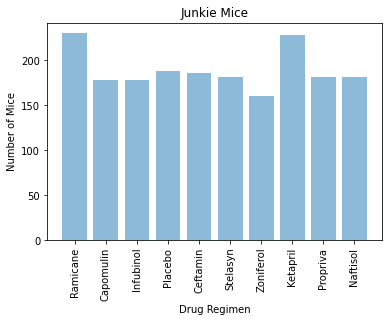

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(mice_count))

plt.bar(x_axis, mice_count, alpha=0.5, align="center")

plt.title("Junkie Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_reg, rotation=90)

plt.show()

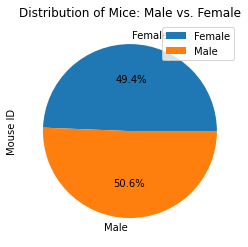

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = mouse_study_clean.groupby("Sex").count()

plot = sex_df.plot.pie(y='Mouse ID', autopct='%1.1f%%')
plt.title("Distribution of Mice: Male vs. Female")
plt.show()

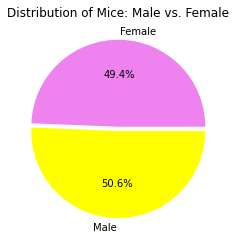

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
size = sex_df["Mouse ID"]
explode = (0.05, 0)
plt.pie(size, explode=explode, labels=labels, colors=["violet", "yellow"],autopct="%1.1f%%")
plt.title("Distribution of Mice: Male vs. Female")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
treatment_df = mouse_study.loc[mouse_study['Drug Regimen'].isin(treatment)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_df.groupby(treatment_df['Mouse ID']).agg({'Timepoint':['max']})
last_timepoint.columns = ['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = last_timepoint.reset_index()
tumor_volume = pd.merge(last_timepoint, mouse_study, how="left", on=["Mouse ID", "Timepoint"])
tumor_volume.head().round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a275,45,Ceftamin,Female,20,28,63.00,3
3,a411,45,Ramicane,Male,3,22,38.41,1
4,a444,45,Ramicane,Female,10,25,43.05,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
volume_mm3 = mouse_study[["Mouse ID", "Tumor Volume (mm3)"]]
quartiles = mouse_study["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Tumor Volume (mm3) is: {round(lowerq,4)}")
print(f"The upper quartile of Tumor Volume (mm3) is: {round(upperq,4)}")
print(f"The interquartile range of Tumor Volume (mm3) is: {round(iqr,4)}")
print(f"The the median of Tumor Volume (mm3) is: {round(quartiles[0.5],4)} ")
print(f"Values below {round(lower_bound,4)} could be outliers.")
print(f"Values above {round(upper_bound,4)} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 45.0
The upper quartile of Tumor Volume (mm3) is: 56.2922
The interquartile range of Tumor Volume (mm3) is: 11.2922
The the median of Tumor Volume (mm3) is: 48.9515 
Values below 28.0617 could be outliers.
Values above 73.2305 could be outliers.


In [15]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    volume_by_drug = tumor_volume['Tumor Volume (mm3)'].loc[tumor_volume['Drug Regimen'] == drug]

    #add subset
    tumor_vol.append(volume_by_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = volume_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



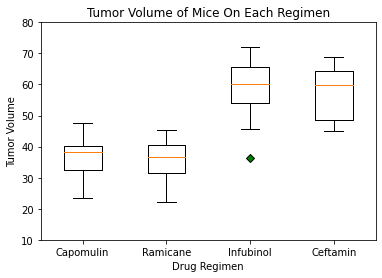

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='o')
fig1, ax1 = plt.subplots()

# Set title, labels, limits
ax1.set_title('Tumor Volume of Mice On Each Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')

ax1.set_ylim(10, 80)
ax1.boxplot(tumor_vol, labels=treatment_list, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Time')

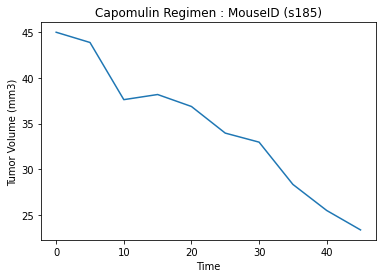

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# find mouse treated with Capomulin
capomulin_mouse = mouse_study[['Timepoint', 'Tumor Volume (mm3)']].loc[(mouse_study['Drug Regimen'] == 'Capomulin') & (mouse_study['Mouse ID']=='s185')]
capomulin_mouse

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin Regimen : MouseID (s185)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time")

Text(0, 0.5, 'Avg Tumor Vol (mm3)')

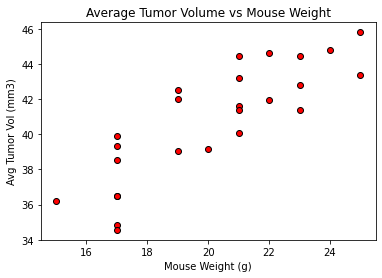

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
vol_tumor = mouse_study[(mouse_study["Drug Regimen"] == "Capomulin")]
vol_tumor = vol_tumor[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight = vol_tumor.groupby(["Mouse ID", "Weight (g)"])

avg_vol_tumor = mouse_weight["Tumor Volume (mm3)"].mean().to_frame()
avg_vol_tumor = avg_vol_tumor.reset_index()

plt.scatter(avg_vol_tumor["Weight (g)"],
            avg_vol_tumor["Tumor Volume (mm3)"],
            marker = 'o',
            facecolors='red',
            edgecolors='black')

plt.title('Average Tumor Volume vs Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_vol_tumor["Weight (g)"], avg_vol_tumor["Tumor Volume (mm3)"])
print(f"The correlation between average mouse weight and tumor volume is {round(correlation[0],2)}")

The correlation between average mouse weight and tumor volume is 0.84


The linear regression equation is y = 0.74x + -10.15


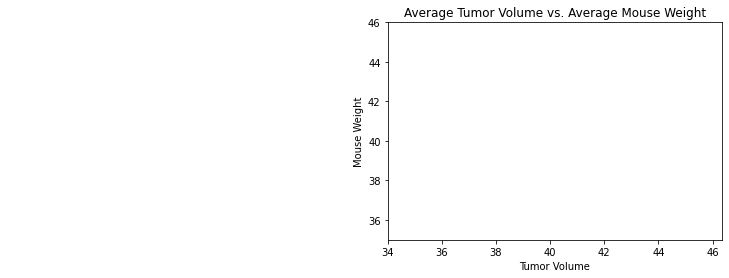

In [39]:
# plot linear regression
y_values = avg_vol_tumor['Weight (g)']
x_values = avg_vol_tumor['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')

plt.scatter(x_values, y_values)
plt.title('Average Tumor Volume vs. Average Mouse Weight')
plt.ylabel('Mouse Weight')
plt.xlabel('Tumor Volume')
plt.ylim(35,46)

reg_values = x_values * slope + intercept
plt.plot(x_values, reg_values, "r-")
plt.annotate(line_eq,(19.95,38),fontsize=15,color="red")
plt.show()